In [52]:
import pandas as pd
from tqdm.notebook import tqdm

dftrain = pd.read_csv('viterbi_train.csv')
dftest = pd.read_csv('viterbi_test.csv')
sen = ''
for i in tqdm(range(dftrain.shape[0])) :
  s = dftrain.iloc[i,0]
  if type(s) == type('') :
    sen = s
  else :
    dftrain.iloc[i,0] = sen

for i in tqdm(range(dftest.shape[0])) :
  if pd.isna(dftest.pos[i]) :
    continue
  s = dftest.iloc[i,0]
  if type(s) == type('') :
    sen = s
  else :
    dftest.iloc[i,0] = sen

train_data = list()
test_data = list()
test_unsupervised = list()

for sen,data in tqdm(dftrain.groupby(dftrain.columns[0])) :
  train_data.append(list(zip(data.word.tolist(),data.pos.tolist())))

for sen,data in tqdm(dftest.groupby(dftest.columns[0])) :
  test_data.append(list(zip(data.word.tolist(),data.pos.tolist())))
  test_unsupervised.append(data.word.tolist())

In [56]:
import nltk

tagger = nltk.HiddenMarkovModelTagger.train(train_data)
print('train')
tagger.test(train_data)
print('test')
tagger.test(test_data)

train
accuracy over 87151 tokens: 97.07
test
accuracy over 22241 tokens: 91.27


In [0]:
predicted = tagger.tag_sents(test_unsupervised)

In [0]:
def flatten(lol) :
  l = list()
  for nl in lol :
    l += nl
  return l

dftest['predict'] = list(zip(*flatten(predicted)))[1]

In [83]:
acc = (dftest.pos == dftest.predict).sum() / dftest.shape[0]
print('Accuracy =', acc)

Accuracy = 0.9126837822040376


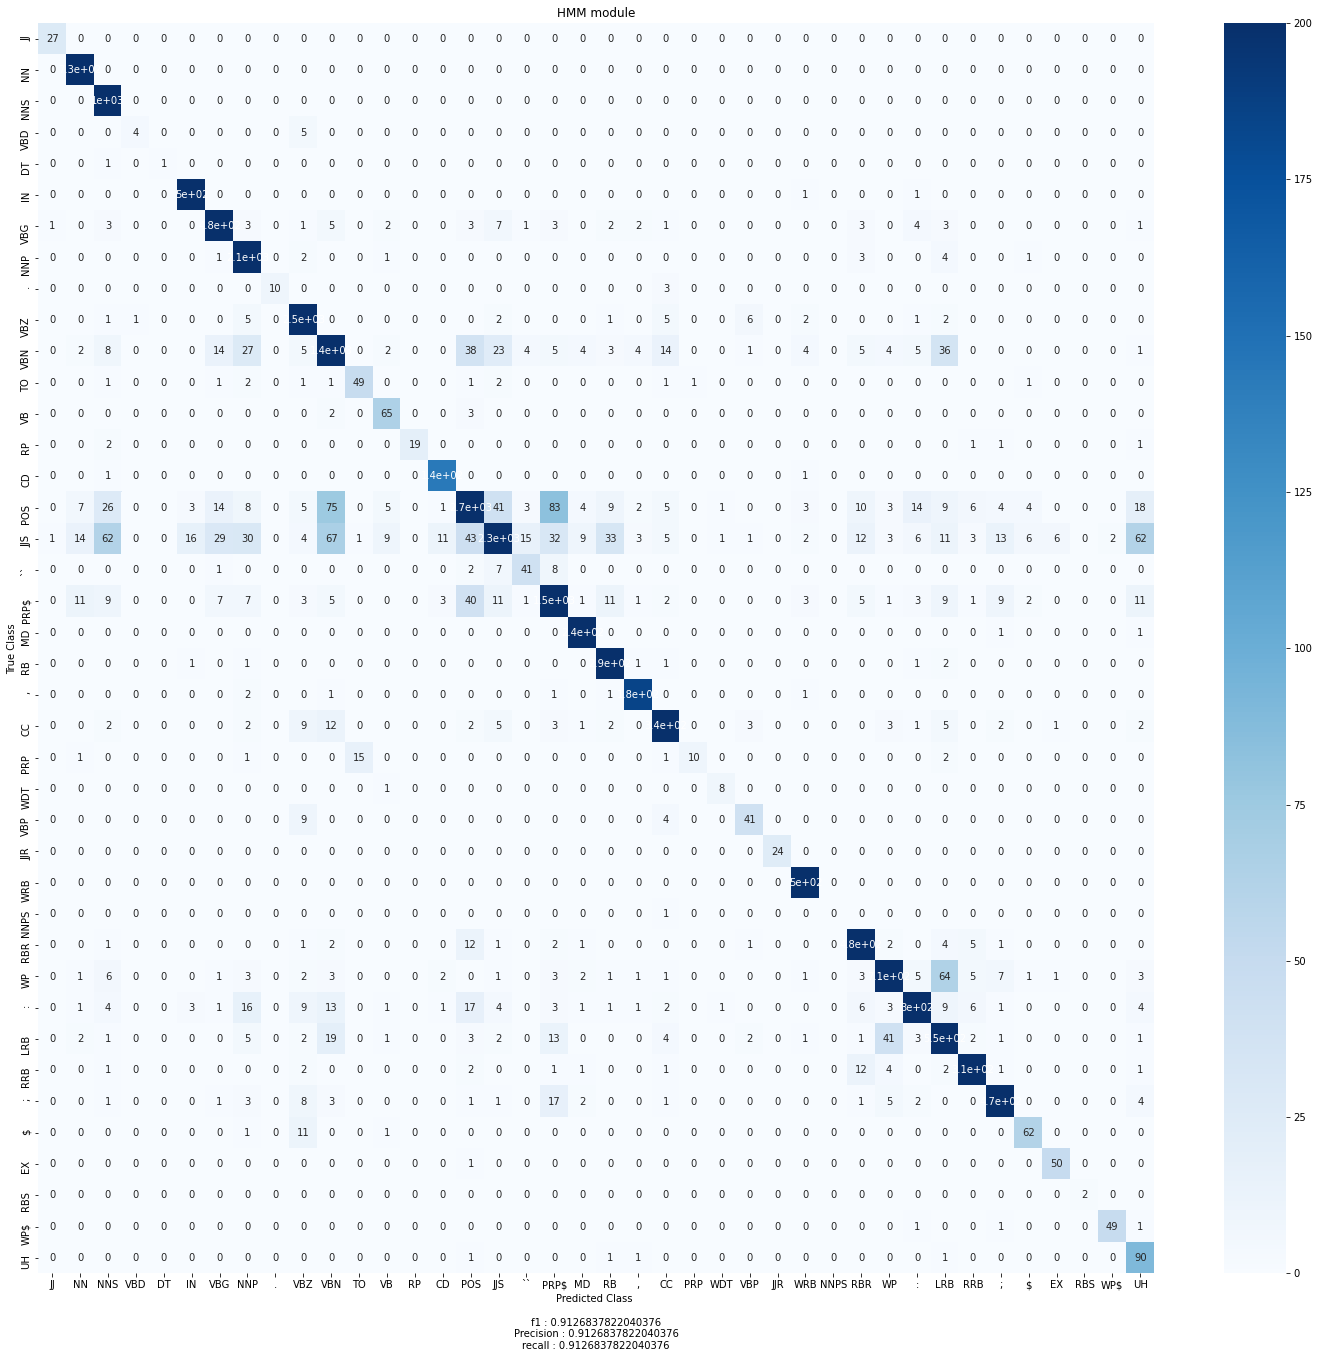

In [87]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sn

fig, ax = plt.subplots(figsize=(25,23))
l,p = dftest.pos.tolist(), dftest.predict.tolist()
cm = confusion_matrix(l,p)
df_cm = pd.DataFrame(cm, pd.unique(l), pd.unique(l))
sn.heatmap(df_cm, annot=True, cmap="Blues", ax=ax, vmax=200)
ax.set_title('HMM module')
ax.set_ylabel('True Class')
ax.set_xlabel('Predicted Class \n\n'
    'f1 : ' + str(f1_score(l,p, average='micro')) + '\n' + \
    'Precision : ' + str(precision_score(l,p, average='micro')) + '\n' + \
    'recall : ' + str(recall_score(l,p, average='micro'))
)
plt.show()

In [88]:
print('f1 : ' + str(f1_score(l,p, average='micro')) + '\n' + \
    'Precision : ' + str(precision_score(l,p, average='micro')) + '\n' + \
    'recall : ' + str(recall_score(l,p, average='micro')))

f1 : 0.9126837822040376
Precision : 0.9126837822040376
recall : 0.9126837822040376
